# Data Cleaning and Analysis: The Stanford Open Policing Project

# Table of Contents:

## Data Exploration and Cleaning
 - [Exploring the Dataset](#section1)<br>
 - [Removing Columns](#section2)<br>
 - [Handling Missing Values](#section3)<br>
 - [Column Cleaning](#section4)<br>
 - [Reordering and Renaming Columns](#section5)<br>
 - [The Cleaned Dataset](#section6)<br>

## Data Analysis and Visualization
 - [Data Analysis: Questions](#section7)<br>

<a id='section1'></a>
### Exploring the Dataset

In [1]:
import pandas as pd

In [2]:
mt = pd.read_csv('mt_statewide_2019_08_13.csv', low_memory=False)

In [3]:
mt.head()

,raw_row_number,date,time,location,lat,lng,county_name,subject_age,subject_race,subject_sex,...,search_basis,reason_for_stop,vehicle_make,vehicle_model,vehicle_type,vehicle_registration_state,vehicle_year,raw_Race,raw_Ethnicity,raw_SearchType
0,1,2009-01-01,02:10:53,US 89 N MM10 (SB),47.572738,-111.802932,Cascade County,16.0,white,female,...,NaN,--- - HIT AND RUN,FORD,EXPLORER,SPORT UTILITY,MT,1994.0,W,N,NO SEARCH REQUESTED
1,2,2009-01-02,11:34:19,HWY 93 SO AND ANNS LANE S/B,46.761225,-114.081142,Missoula County,19.0,white,male,...,NaN,EXPIRED TAG ( - MONTHS OR LESS ),GMC,TK,TRUCK,MT,1996.0,W,N,NO SEARCH REQUESTED
2,3,2009-01-03,11:36:42,P007 HWY 93 MM 77 N/B,46.694683,-114.073505,Missoula County,17.0,white,male,...,NaN,SPEED,GMC,YUKON,SPORT UTILITY,MT,1999.0,W,N,NO SEARCH REQUESTED
3,4,2009-01-04,10:33:11,P007 HWY 93 MM 81 S/B,46.727388,-114.079027,Missoula County,17.0,NaN,female,...,NaN,SPEED,HOND,CR-V,SPORT UTILITY,MT,2002.0,W,NaN,NaN
4,5,2009-01-04,10:46:43,P007 HWY 93 MM 81 N/B,46.729518,-114.079150,Missoula County,31.0,NaN,male,...,NaN,SPEED,TOYT,TERCEL,SEDAN,MT,1992.0,I,NaN,NaN


In [4]:
mt.shape

(825118, 29)

In [5]:
mt.dtypes

raw_row_number                  int64
date                           object
time                           object
location                       object
lat                           float64
lng                           float64
county_name                    object
subject_age                   float64
subject_race                   object
subject_sex                    object
department_name                object
type                           object
violation                      object
arrest_made                      bool
citation_issued                  bool
warning_issued                   bool
outcome                        object
frisk_performed                object
search_conducted                 bool
search_basis                   object
reason_for_stop                object
vehicle_make                   object
vehicle_model                  object
vehicle_type                   object
vehicle_registration_state     object
vehicle_year                  float64
raw_Race    

<a id='section2'></a>
### Removing Columns

In [6]:
cols_to_drop = [
    'raw_row_number',
    'location',
    'lat',
    'lng',
    'county_name',
    'subject_race',
    'department_name',
    'type',
    'search_basis',
    'vehicle_model',
    'vehicle_registration_state',
    'raw_Race',
    'raw_Ethnicity',
    'raw_SearchType'
]

mt.drop(cols_to_drop, axis=1, inplace=True)

<a id='section3'></a>
### Handling Missing Values

In [7]:
# missing values as a % of the whole dataset
mt.isna().sum()/len(mt)*100

date                0.001333
time                0.001333
subject_age         0.392186
subject_sex         0.014422
violation           0.008847
arrest_made         0.000000
citation_issued     0.000000
warning_issued      0.000000
outcome             0.030299
frisk_performed     0.011392
search_conducted    0.000000
reason_for_stop     0.001333
vehicle_make        0.517259
vehicle_type        7.921534
vehicle_year        0.953682
dtype: float64

In [8]:
mt.dropna(inplace=True)

<a id='section4'></a>
### Column Cleaning 

In [10]:
combined = mt.date.str.cat(mt.time, sep=' ')
mt['stop_datetime'] = pd.to_datetime(combined)
mt.drop(['date', 'time'], axis=1, inplace=True)

In [11]:
mt['subject_age'] = mt.subject_age.astype(int)
mt['vehicle_year'] = mt.vehicle_year.astype(int)

In [12]:
mt['outcome'] = mt.outcome.map({'warning': 'Warning', 'citation': 'Citation', 'arrest': 'Arrest'})

In [13]:
mt['subject_sex'] = mt.subject_sex.map({'male': 'M', 'female': 'F'})

In [14]:
mt.loc[mt.vehicle_make.str.contains('FORD'), 'vehicle_make'] = 'FORD'
mt.loc[mt.vehicle_make.str.contains('CHEV'), 'vehicle_make'] = 'CHEVROLET'
mt.loc[mt.vehicle_make.str.contains('DODG'), 'vehicle_make'] = 'DODGE'
mt.loc[mt.vehicle_make.str.contains('TOYO'), 'vehicle_make'] = 'TOYOTA'
mt.loc[mt.vehicle_make.str.contains('NISS'), 'vehicle_make'] = 'NISSAN'
mt.loc[mt.vehicle_make.str.contains('GMC'), 'vehicle_make'] = 'GMC'
mt.loc[mt.vehicle_make.str.contains('SUBA'), 'vehicle_make'] = 'SUBARU'
mt.loc[mt.vehicle_make.str.contains('PONT'), 'vehicle_make'] = 'PONTIAC'
mt.loc[mt.vehicle_make.str.contains('JEEP'), 'vehicle_make'] = 'JEEP'
mt.loc[mt.vehicle_make.str.contains('HOND'), 'vehicle_make'] = 'HONDA'
mt.loc[mt.vehicle_make.str.contains('BUIC'), 'vehicle_make'] = 'BUICK'
mt.loc[mt.vehicle_make.str.contains('VOLV'), 'vehicle_make'] = 'VOLVO'
mt.loc[mt.vehicle_make.str.contains('VOLKS'), 'vehicle_make'] = 'VOLKSWAGEN'
mt.loc[mt.vehicle_make.str.contains('CHRY'), 'vehicle_make'] = 'CHRYSTLER'
mt.loc[mt.vehicle_make.str.contains('OLD'), 'vehicle_make'] = 'OLDSMOBILE'
mt.loc[mt.vehicle_make.str.contains('CADI'), 'vehicle_make'] = 'CADILLAC'
mt.loc[mt.vehicle_make.str.contains('MAZD'), 'vehicle_make'] = 'MAZDA'
mt.loc[mt.vehicle_make.str.contains('HYUN'), 'vehicle_make'] = 'HYUNDAI'
mt.loc[mt.vehicle_make.str.contains('KIA'), 'vehicle_make'] = 'KIA'
mt.loc[mt.vehicle_make.str.contains('MERC'), 'vehicle_make'] = 'MERCURY'
mt.loc[mt.vehicle_make.str.contains('AUDI'), 'vehicle_make'] = 'AUDI'
mt.loc[mt.vehicle_make.str.contains('BMW'), 'vehicle_make'] = 'BMW'
mt.loc[mt.vehicle_make.str.contains('MITSU'), 'vehicle_make'] = 'MITSUBISHI'

In [15]:
mt.loc[mt.vehicle_type.str.contains('TRUCK|Truck|truck|PICKUP|Pickup|pickup'), 'vehicle_type'] = 'PICKUP'
mt.loc[mt.vehicle_type.str.contains('SEDAN|Sedan|sedan'), 'vehicle_type'] = 'SEDAN'
mt.loc[mt.vehicle_type.str.contains('SPORT UTILITY|Sport Utility|sport utility|UTILITY|Utility|utility'), 'vehicle_type'] = 'SUV'
mt.loc[mt.vehicle_type.str.contains('VAN|Van|van'), 'vehicle_type'] = 'VAN'
mt.loc[mt.vehicle_type.str.contains('COUPE|Coupe|coupe'), 'vehicle_type'] = 'COUPE'
mt.loc[mt.vehicle_type.str.contains('MOTORCYCLE|Motorcycle|motorcycle|MOTORBIKE|Motorbike|motorbike'), 'vehicle_type'] = 'MOTORCYCLE'
mt.loc[mt.vehicle_type.str.contains('HATCHBACK|Hatchback|hatchback'), 'vehicle_type'] = 'HATCHBACK'
mt.loc[mt.vehicle_type.str.contains('TRACTOR|Tractor|tractor'), 'vehicle_type'] = 'TRACTOR'

In [16]:
mt['reason_for_stop'] = mt.reason_for_stop.str.replace('--- - ','')
mt.loc[mt.reason_for_stop.str.lower().str.contains('speed'), 'reason_for_stop'] = 'Speeding'
mt.loc[mt.reason_for_stop.str.lower().str.contains('revoked|license|plate|registration|cmv|inspection|permit|insurance'), 'reason_for_stop'] = 'License/Registration/Plates'
mt.loc[mt.reason_for_stop.str.lower().str.contains('improper|light|violation|stop|driving|right of way|hazard|crossing|too close'), 'reason_for_stop'] = 'Moving Violation'
mt.loc[mt.reason_for_stop.str.lower().str.contains('debris|restrictive|load|defective|equipment|size|weight|height|smoke|exhaust|width|length|container|axle'), 'reason_for_stop'] = 'Equipment'
mt.loc[~(mt.reason_for_stop.str.contains('Speeding|Moving Violation|License/Registration/Plates|Equipment')), 'reason_for_stop'] = 'Other'

In [17]:
mt['violation'] = mt.violation.str.replace(r'\d{3} - ', '', regex=True).str.split('|')
mt['num_violations'] = mt.violation.apply(lambda x: len(x))

<a id='section5'></a>
### Reordering and Renaming Columns

In [25]:
new_col_order = [
    'stop_datetime',
    'subject_age',
    'subject_sex',
    'vehicle_make',
    'vehicle_type',
    'vehicle_year',
    'reason_for_stop',
    'outcome',
    'violation',
    'num_violations',
    'warning_issued',
    'citation_issued',
    'arrest_made',
    'frisk_performed',
    'search_conducted'
]

mt = mt[new_col_order]

In [27]:
column_mapper = {
    'subject_age': 'driver_age',
    'subject_sex': 'driver_gender',
    'vehicle_make': 'vehicle_brand',
    'reason_for_stop': 'stop_reason'
}

mt.rename(column_mapper, axis=1, inplace=True)

<a id='section6'></a>
### The Cleaned Dataset 

In [28]:
mt.head()

,stop_datetime,driver_age,driver_gender,vehicle_brand,vehicle_type,vehicle_year,stop_reason,outcome,violation,num_violations,warning_issued,citation_issued,arrest_made,frisk_performed,search_conducted
0,2009-01-01 02:10:53,16,F,FORD,SUV,1994,Other,Citation,"[INSURANCE, HIT AND RUN, OTHER NON-HAZARDOUS]",3,True,True,False,False,False
1,2009-01-02 11:34:19,19,M,GMC,PICKUP,1996,Other,Arrest,"[EXPIRED TAG ( 4 MONTHS OR LESS ), SEATBELT ( ...",3,True,False,True,False,False
2,2009-01-03 11:36:42,17,M,GMC,SUV,1999,Speeding,Arrest,[SPEED],1,False,False,True,False,False
6,2009-01-04 17:45:40,30,M,SUBARU,PK,2006,Equipment,Citation,[INSURANCE],1,False,True,False,False,False
8,2009-01-06 16:45:12,21,M,BMW,4D,1992,Speeding,Citation,[SPEED OVER LEGAL],1,False,True,False,False,False


In [38]:
print('{:.2f}% of the original dataset remains after data cleaning.'.format((mt.shape[0]/825118)*100))

91.37% of the original dataset remains after data cleaning.


<a id='section7'></a>
### Data Analysis: Questions

In [21]:
# traffic stops by day of the week
new_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mt.stop_datetime.dt.weekday_name.value_counts().reindex(index=new_index).plot(kind='bar')

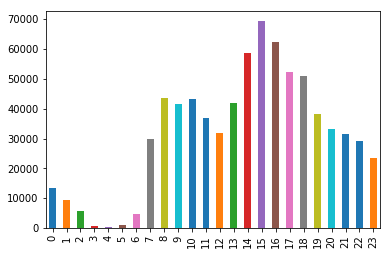

In [22]:
mt.stop_datetime.dt.hour.value_counts().sort_index().plot(kind='bar')